In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from skimage.feature import hog
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
data_potholes = []
for entry in glob.glob("/content/drive/MyDrive/data/split_data/train/pothole/*.png"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(64,32))
  resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd = hog(resized_img)
  data_potholes.append(fd)

data_bumps = []
for entry in glob.glob("/content/drive/MyDrive/data/split_data/train/speedbump/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(64,32))
  resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd = hog(resized_img)
  data_bumps.append(fd)

data_plains = []
for entry in glob.glob("/content/drive/MyDrive/data/split_data/train/normal/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(64,32))
  resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd = hog(resized_img)
  data_bumps.append(fd)

train_data = data_potholes + data_bumps + data_plains
print(len(train_data))

543


In [ ]:
train_label_list = []
for i in range(len(train_data)):
  if i < 90:
    train_label_list.append('potholes')
  elif:
    train_label_list.append('bumps')
  else:
    train_label_list.append('plain')
print(train_label_list)
print(len(train_label_list))

SyntaxError: ignored

In [ ]:
test_potholes = []
for entry in glob.glob("Bumps and Potholes/test_set/potholes/*.png"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(64,32))
  resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd = hog(resized_img)
  test_dict = {'data':fd, 'label':'potholes'}
  test_potholes.append(test_dict)

test_bumps = []
for entry in glob.glob("Bumps and Potholes/test_set/bumps/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(64,32))
  resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd = hog(resized_img)
  test_dict = {'data':fd, 'label':'bumps'}
  test_bumps.append(test_dict)

test_plains = []
for entry in glob.glob("Bumps and Potholes/test_set/plain/*.jpg"):
  img = np.array(mpimg.imread(entry))
  resized_img = cv2.resize(img,(64,32))
  resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  fd = hog(resized_img)
  test_dict = {'data':fd, 'label':'bumps'}
  test_bumps.append(test_dict)

test_data = test_potholes + test_bumps + test_plains
print(len(test_data))

151


In [ ]:
test_features = []
test_lables = []
for i in test_data:
  test_lables.append(i['label'])
  test_features.append(i['data'])
print(len(test_features))
print(test_lables)

151
['potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes', 'potholes',

In [ ]:
x_axis_k_points = []

f1_euclidean = []
accuracies_euclidean = []
conf_matrix_euclidean = []

for k in range(7):
  knn_euclidean = KNeighborsClassifier(n_neighbors=k+1)
  knn_euclidean.fit(train_data, train_label_list)

  pred_lables_euclidean = knn_euclidean.predict(test_features)

  acc_euclidean = knn_euclidean.score(test_features,test_lables)
  accuracies_euclidean.append(acc_euclidean)

  conf_matrix_euclidean.append(metrics.confusion_matrix(test_lables, pred_lables_euclidean))
  f1_euclidean.append(metrics.f1_score(test_lables, pred_lables_euclidean, pos_label = 'potholes'))

  x_axis_k_points.append(k+1)

In [ ]:
for i in range(len(f1_euclidean)):
  print('For k = ', i+1, ', F1 score = ', f1_euclidean[i], 'Accuracy = ', accuracies_euclidean[i], ', \nConfusion Matrix: ', conf_matrix_euclidean[i])

For k =  1 , F1 score =  0.9944134078212291 Accuracy =  0.9933774834437086 , 
Confusion Matrix:  [[61  1]
 [ 0 89]]
For k =  2 , F1 score =  0.9411764705882353 Accuracy =  0.9337748344370861 , 
Confusion Matrix:  [[61  1]
 [ 9 80]]
For k =  3 , F1 score =  0.894736842105263 Accuracy =  0.8675496688741722 , 
Confusion Matrix:  [[46 16]
 [ 4 85]]
For k =  4 , F1 score =  0.908108108108108 Accuracy =  0.8874172185430463 , 
Confusion Matrix:  [[50 12]
 [ 5 84]]
For k =  5 , F1 score =  0.8762886597938143 Accuracy =  0.8410596026490066 , 
Confusion Matrix:  [[42 20]
 [ 4 85]]
For k =  6 , F1 score =  0.888888888888889 Accuracy =  0.8609271523178808 , 
Confusion Matrix:  [[46 16]
 [ 5 84]]
For k =  7 , F1 score =  0.86 Accuracy =  0.8145695364238411 , 
Confusion Matrix:  [[37 25]
 [ 3 86]]


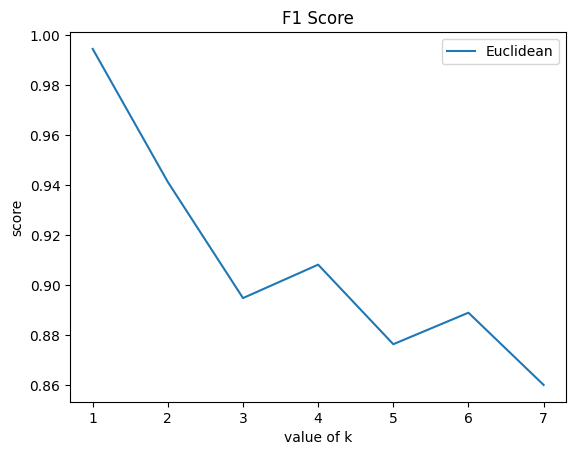

In [ ]:
plt.plot(x_axis_k_points, f1_euclidean, label = 'Euclidean')
plt.title("F1 Score")
plt.xlabel("value of k")
plt.ylabel("score")
plt.legend()
plt.show()

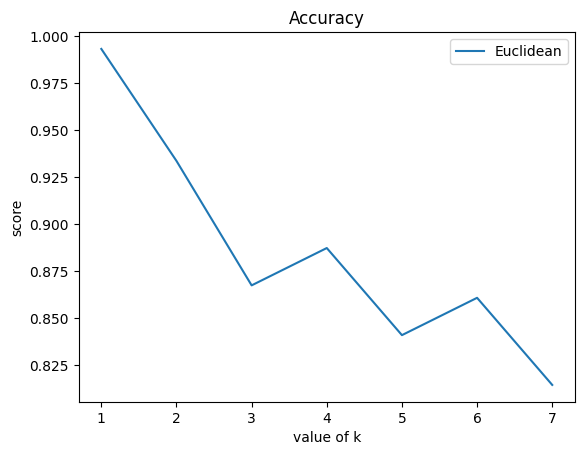

In [ ]:
plt.plot(x_axis_k_points, accuracies_euclidean, label = 'Euclidean')
plt.title("Accuracy")
plt.xlabel("value of k")
plt.ylabel("score")
plt.legend()
plt.show()

In [ ]:
accuracy = np.mean(accuracies_euclidean)
accuracy

0.8855250709555345